<a href="https://colab.research.google.com/github/beatrixvascc/knn_zoo/blob/main/zooKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zoo = pd.read_csv("zoo.csv")
row=0
for i in zoo['class_type']:
  if i==5:
    print(zoo.iloc[row:row+1])
  row+=1

   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
25        frog     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
25        1         1         1         0     0     4     0         0   

    catsize  class_type  
25        0           5  
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
26        frog     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
26        1         1         1         1     0     4     0         0   

    catsize  class_type  
26        0           5  
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
52        newt     0         0     1     0         0        1         1   

    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
52        1         1         1         0     0     4     1         0   

  

In [ ]:
zoo = pd.read_csv("zoo.csv")
zoodata = pd.DataFrame(zoo)
row=0
for i,row in zoodata.iterrows():
  if i==3:
    print(row["animal_name"])
  row=+1



bear


encontra o array pra fazer o if/else e saber o numero de indices na lista

In [ ]:

pernas = zoo["legs"].unique() #pega todos os valores diferentes de quantidade de perna
pernas.sort()   #ordena do menor pro maior
pernas


array([0, 2, 4, 5, 6, 8])

cria a lista de quantidades e o grafico

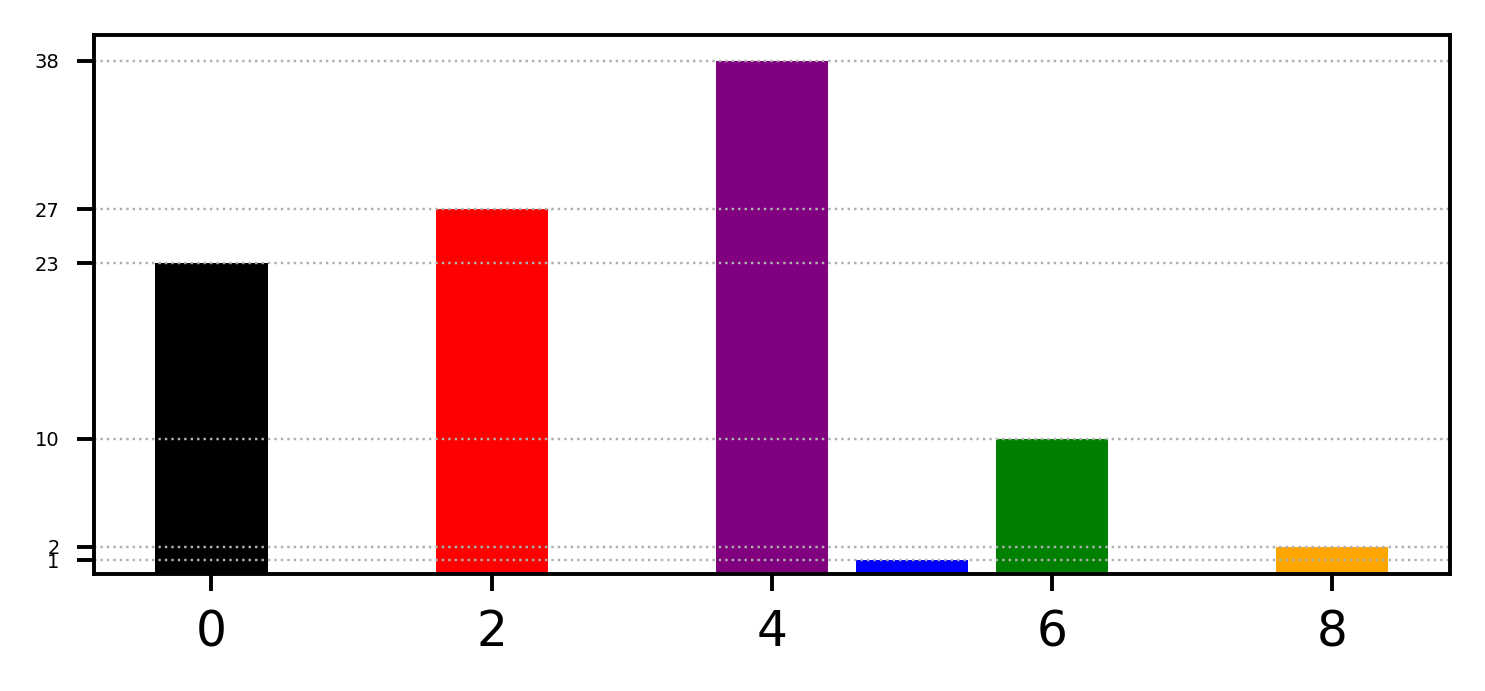

In [ ]:

qtd = [0, 0, 0, 0, 0, 0]
for i in zoo["legs"]:
  if i==0:   #se nao tiver perna adiciona em qtd[0]
    qtd[0]+=1
  elif i==2:  #se tiver uma perna adiciona em qtd[1]
    qtd[1]+=1
  elif i==4:   #se tiver quatro pernas adiciona em qtd[2]....
    qtd[2]+=1
  elif i==5:  #se tiver quatro pernas adiciona em qtd[3]
    qtd[3]+=1
  elif i==6:  #se tiver quatro pernas adiciona em qtd[4]
    qtd[4]+=1
  elif i==8: #se tiver quatro pernas adiciona em qtd[5]
    qtd[5]+=1


plt.figure(figsize=(5, 2), dpi=350)
plt.bar(x=pernas, height=qtd, color=['black', 'red', 'purple', 'blue','green','orange'])
plt.yticks(qtd, fontsize=4)
plt.grid(axis='y', linestyle='dotted', linewidth=0.5)



para knn usando scikit learn

In [ ]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

le o arquivo

In [ ]:
zoo = pd.read_csv("zoo.csv")

exclui as colunas inuteis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score

# Para o kNN
from sklearn.neighbors import KNeighborsClassifier

X = zoo.drop(columns="class_type")
X = X.drop(columns="animal_name")
X.head()

y = zoo["class_type"] # Atribuindo a coluna de classe a variavel y
y.head()

0    1
1    1
2    4
3    1
4    1
Name: class_type, dtype: int64

agora separa os dados em conjunto de teste e treinamento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=13)


encontra agora o numero de vizinhos

In [ ]:
classificador = KNeighborsClassifier(n_neighbors=5)

treina o modelo

In [ ]:
classificador.fit(X_train,y_train)

KNeighborsClassifier()

preve  os resultados com os dados teste

In [ ]:
macumba = classificador.predict(X_test)

ve a acuracia do modelo

In [ ]:
accuracy_score(y_true=y_test,y_pred=macumba)

0.9032258064516129

ve a matriz de confusao que mostra os erros

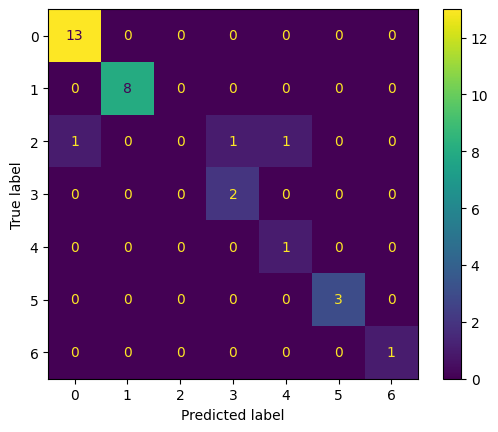

In [ ]:
matriz = confusion_matrix(y_true=y_test,y_pred=macumba)
matriz
matriz = ConfusionMatrixDisplay(confusion_matrix=matriz)
matriz.plot()